### Introduction
In order to  train a predictive model, we have many supervised learning algorithms to choose from such as Regression, Decision Trees, Neural Networks etc. While these algorithms are significantly different in many fundamental ways, differences can also be studied based on the prediction error of the models often studied under the umbrella term bias-variance. The goal of this notebook is to explain the bias-variance trade-off. 

I wrote this notebook while I was trying to understand the concept myself. I am thankful to __[this](http://scott.fortmann-roe.com/docs/BiasVariance.html)__ blog and __[this](https://github.com/justmarkham/DAT8/blob/master/notebooks/08_bias_variance.ipynb)__ notebook for making this concept clear to me. I have modified the script given in the latter to explain the same concept here. 

### Bias
Bias is defined as the difference between the expected prediction of the model and the correct value of the population parameters which we are trying to predict. For a moment consider that we could repeat the whole model building process multiple times; each time on a different sample from the population. There is some inherent randomness in the sample generating process which gives some novelty to the dataset. Consequent to this, the predictive model will have a range of predictions. Bias measures how far off in general these models' predictions are from the correct value.

### Variance
Variance is defined as variability of a model prediction for a __given data point__. Here again, let's imagine that we are repeating the model building process multiple times. The variance is how much the predictions for a given data point vary between different realizations of the model.   

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# allow plots to appear in the notebook
%matplotlib inline

### Dataset description
We will be using the _brain and body weight dataset_ for illustrating the bias-variance trade-off. This dataset contains the average weight of brain and body for a number of mammals. There are 62 instances and 3 columns. The columns are:
1. the index
2. the brain weight
3. the body weight

In [15]:
url = 'http://people.sc.fsu.edu/~jburkardt/datasets/regression/x01.txt'
col_names = ['ID', 'Brain Weight', 'Body Weight']
mammals = pd.read_table(url, sep='\s+', skiprows=33, names=col_names, index_col='ID')
mammals.head()

,Brain Weight,Body Weight
ID,,
1,3.385,44.5
2,0.480,15.5
3,1.350,8.1
4,465.000,423.0
5,36.330,119.5


In [16]:
# mammals.describe()

In [17]:
# Only keep rows in which the body weight is less than 200
# mammals = mammals[mammals.body < 200]
# mammals["Body Weight"]
mammals = mammals[mammals["Body Weight"]< 200]
mammals.shape

(51, 2)

### Scatter plot to visualize brain and body weight
The scatter plot produced by the following snippet shows that there exists some kind of relationship between the brain and body weight of mammals. Seaborn's `lmplot` has been used for the 2D scatterplot. It has an option to overlay a regression line over the scatter plot which we will be using later in the notebook. 

(-10, 250)

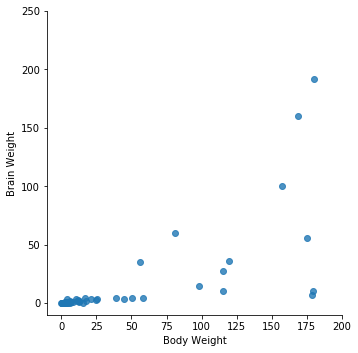

In [18]:
sns.lmplot(x='Body Weight', y='Brain Weight', data=mammals, ci=None, fit_reg=False)
plt.xlim(-10, 200)
plt.ylim(-10, 250)

### Linear model
The code snippet below fits a linear model to the entire dataset. 

(-10, 250)

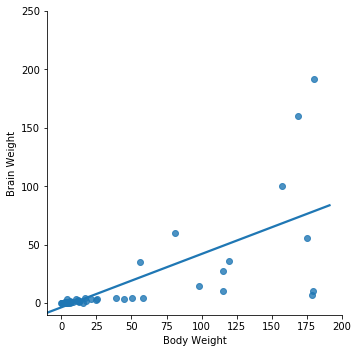

In [19]:
sns.lmplot(x='Body Weight', y='Brain Weight', data=mammals, ci=None)
plt.xlim(-10, 200)
plt.ylim(-10, 250)

Based on this linear model, for a mammal with average body weight 100, the predicted brain weight will be somewhere between 45-50. 

### Model Prediction
Let's consider a situation that instead of the information on all the mammals, we have a two mutually exclusive datasets, each being a subset of the parent dataset. To get the subsets, we will randomly assign each instance to one of the two subsets. Subsequent to this, we will fit a linear model on the resulting subsets. 

In [20]:
# set a random seed for reproducibility
np.random.seed(12345)

# randomly assign every observation to either universe 1 or universe 2
mammals['subset'] = np.random.randint(1, 3, len(mammals))
mammals.head()

,Brain Weight,Body Weight,subset
ID,,,
1,3.385,44.5,1
2,0.480,15.5,2
3,1.350,8.1,2
5,36.330,119.5,2
6,27.660,115.0,1


In [21]:
# col='universe' subsets the data by universe and creates two separate plots
# sns.lmplot(x='body', y='brain', data=mammals, ci=None, col='subsets')
# plt.xlim(-10, 200)
# plt.ylim(-10, 250)

Using the following code snippet, we will plot the predicted linear relationship obtained using the two data subsets. 

We can notice in the plot below that regardless of the fact that different data was using while fitting the linear model, the prediction from the two is more or less the same. As an example, for a mammal with an average body weight as 100, both the models will predict the average brain weight somewhere between 45 to 50. 

This is what demonstrates a __high bias__ and __low variance__ model. High bias implies that the model lacks the flexibility to optimally fit the data. Low variance means that the model's prediction doesn't change much regardless of which data subset from the overall sample is chosen for training. 

(-10, 250)

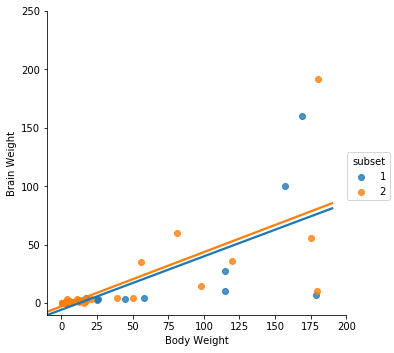

In [22]:
# hue='universe' subsets the data by universe and creates a single plot
sns.lmplot(x='Body Weight', y='Brain Weight', data=mammals, ci=None, hue='subset')
plt.xlim(-10, 200)
plt.ylim(-10, 250)

### Low bias, High variance
Code snippet below fits a polynomial of order 8 to the data. Plot shows that the model fit over data. This model has a low bias because the models fits the data pretty well. It has a high variance because the models are significantly different depending on which observation happens to be available in a subset. For a mammal with a body weight 100, the brain weight predicted by the two models will be 45 and 10 respectively. 

(-10, 250)

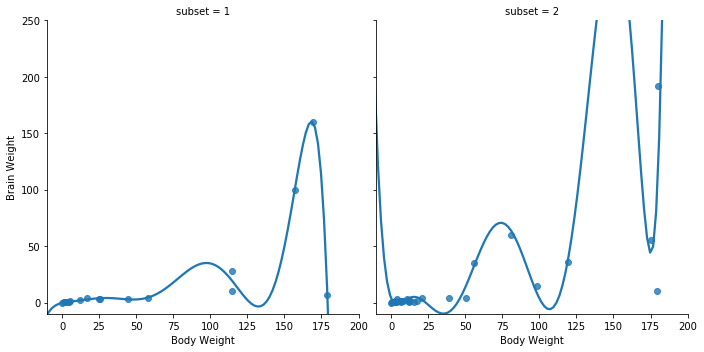

In [23]:
sns.lmplot(x='Body Weight', y='Brain Weight', data=mammals, ci=None, col='subset', order=8)
plt.xlim(-10, 200)
plt.ylim(-10, 250)

### Optimal bias and variance
In the two models shown earlier, the first one was an example of underfitting (high bias low variance) while the latter was an example of overfitting (low bias high variance). The snippet below fits a second order polynomial on the two subsets of data. 

We can see from the plots that this model fits the data optimally. This is what is known as the bias-variance trade-off. Goal is to come up with a model that balances the bias and variance so that it generalizes to unseen data aka 'out-of-sample' data. 

(-10, 250)

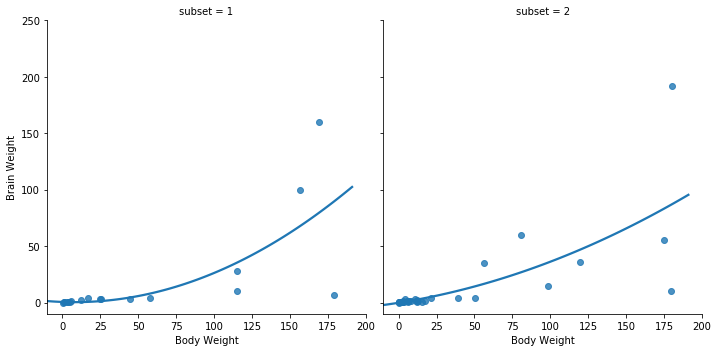

In [24]:
sns.lmplot(x='Body Weight', y='Brain Weight', data=mammals, ci=None, col='subset', order=2)
plt.xlim(-10, 200)
plt.ylim(-10, 250)